In [34]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from dotenv import load_dotenv
import pandas as pd

In [2]:
load_dotenv()

True

In [5]:
df = pd.read_csv( 
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
)

In [8]:
# Initialize the agent Using Zero_shot_react_description
llm_1 = OpenAI(temperature=0)
agent = create_pandas_dataframe_agent(llm_1,
                                      df, 
                                      verbose=True,
                                      allow_dangerous_code=True)

In [10]:
result = agent.invoke("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: len(df)891891 is the number of rows in the dataframe
Final Answer: 891

> Finished chain.


In [12]:
result["output"]

'891'

In [14]:
llm_2 = ChatOpenAI(temperature=0, model="gpt-4o-mini")
agent_1 = create_pandas_dataframe_agent(
    llm_2,
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True,
)

In [15]:
agent_1.invoke("how many rows are there for people who survived?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[df['Survived'] == 1].shape[0]"}`


342There are 342 rows for people who survived.

> Finished chain.


{'input': 'how many rows are there for people who survived?',
 'output': 'There are 342 rows for people who survived.'}



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Count the number of survivors\nsurvivors_count = df['Survived'].sum()\n\n# Filter the dataframe for survivors\nsurvivors_df = df[df['Survived'] == 1]\n\n# Plotting the class and gender of survivors\nplt.figure(figsize=(10, 6))\nplt.hist2d(survivors_df['Pclass'], survivors_df['Sex'], bins=[3, 2], cmap='Blues')\nplt.colorbar(label='Number of Survivors')\nplt.xlabel('Passenger Class')\nplt.ylabel('Gender')\nplt.title('Survivors by Class and Gender')\nplt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])\nplt.show()\n\nsurvivors_count"}`


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Count the number of survivors\nsur

<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


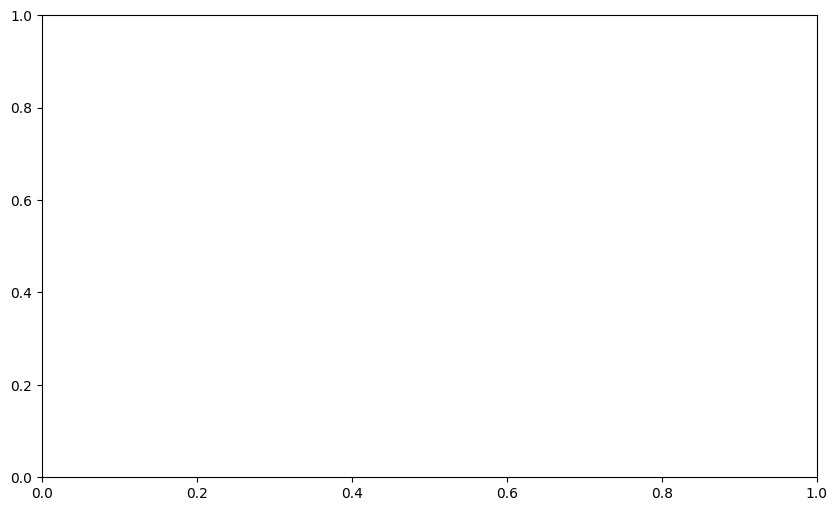

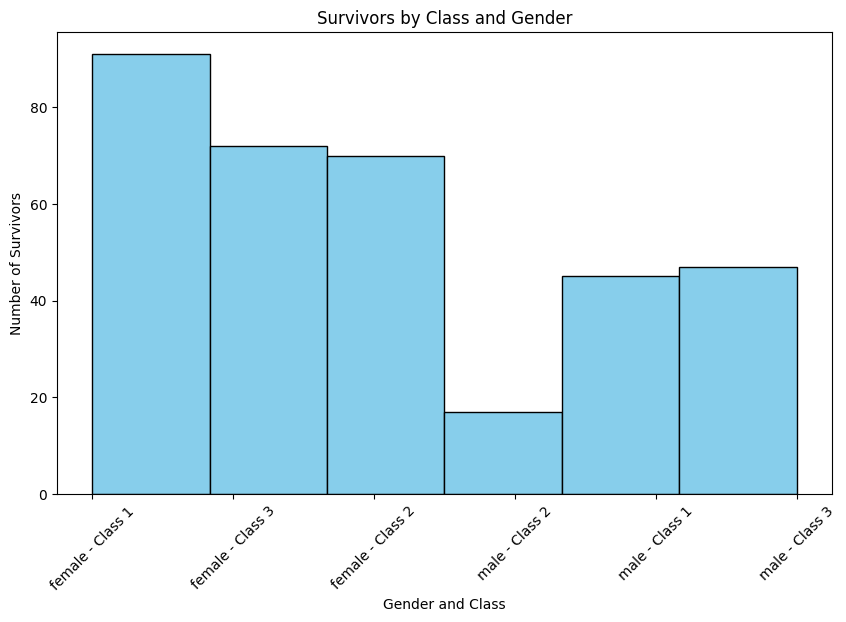

342The total number of survivors is **342**.

Now, let's discuss why more third-class passengers survived. 

1. **Survival Rates**: While it may seem counterintuitive, the survival rate for third-class passengers was higher than expected due to various factors. Many third-class passengers were young and healthy, which may have contributed to their survival.

2. **Access to Lifeboats**: The Titanic had a limited number of lifeboats, and the evacuation process was chaotic. Some third-class passengers were located in areas that were less accessible, but those who managed to reach the lifeboats had a chance to survive.

3. **Social Dynamics**: The social dynamics on the Titanic played a role in survival. First-class passengers were often prioritized during the evacuation, but as the situation became more desperate, some third-class passengers were able to board lifeboats.

4. **Demographics**: The demographics of third-class passengers included a significant number of women and children, w

{'input': 'how many people survived and plot their class and gender. And answer why more third class passagners survived',
 'output': "The total number of survivors is **342**.\n\nNow, let's discuss why more third-class passengers survived. \n\n1. **Survival Rates**: While it may seem counterintuitive, the survival rate for third-class passengers was higher than expected due to various factors. Many third-class passengers were young and healthy, which may have contributed to their survival.\n\n2. **Access to Lifeboats**: The Titanic had a limited number of lifeboats, and the evacuation process was chaotic. Some third-class passengers were located in areas that were less accessible, but those who managed to reach the lifeboats had a chance to survive.\n\n3. **Social Dynamics**: The social dynamics on the Titanic played a role in survival. First-class passengers were often prioritized during the evacuation, but as the situation became more desperate, some third-class passengers were able

In [18]:
agent_1.invoke("how many people survived and plot their class and gender. And answer why more third class passagners survived")

In [35]:
question = """use a random forest model then an xgboost model to predict
who would most likely survive. Then use the confusion matrix for each model to determine which model
produces the better prediction. Then use the best model to predict who survived against who actually survived. 
Plot the predicted results against the true results. To use random forest and xgboost import the following:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
"""



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nimport xgboost as xgb\nfrom sklearn.metrics import confusion_matrix, accuracy_score\nimport matplotlib.pyplot as plt\n\n# Load the dataset (assuming df is already defined)\n# df = pd.read_csv('path_to_your_data.csv')  # Uncomment if loading from a CSV\n\n# Preprocessing the data\n# Fill missing values for Age with the median\ndf['Age'].fillna(df['Age'].median(), inplace=True)\n# Convert categorical variables to numerical\ndf['Sex'] = df['Sex'].map({'male': 0, 'female': 1})\n# Drop columns that won't be used in the model\nX = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)\nY = df['Survived']\n\n# Split the data into training and testing sets\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\n\n#

<string>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Invoking: `python_repl_ast` with `{'query': "# It seems there was an issue with the 'Sex' column. Let's check the columns in the dataframe.\ndf.columns.tolist()"}`


['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Invoking: `python_repl_ast` with `{'query': "# The 'Sex' column has been transformed into 'Sex_male' and 'Embarked' has been one-hot encoded. Let's adjust the preprocessing accordingly.\n\n# Preprocessing the data\n# Fill missing values for Age with the median\ndf['Age'].fillna(df['Age'].median(), inplace=True)\n# Drop columns that won't be used in the model\nX = df.drop(['Survived'], axis=1)\nY = df['Survived']\n\n# Split the data into training and testing sets\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\n\n# Random Forest Model\nrf_model = RandomForestClassifier(random_state=42)\nrf_model.fit(X_train, Y_train)\nrf_predictions = rf_model.predict(X_test)\n\n# XGBoost Model\nxgb_mod

<string>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/Users/jerrymegaro/Library/CloudStorage/OneDrive-Proconex/AI-DeltaV Event Logs/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:58:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(array([[85, 24],
       [17, 52]]), 0.7696629213483146, array([[91, 18],
       [15, 54]]), 0.8146067415730337)

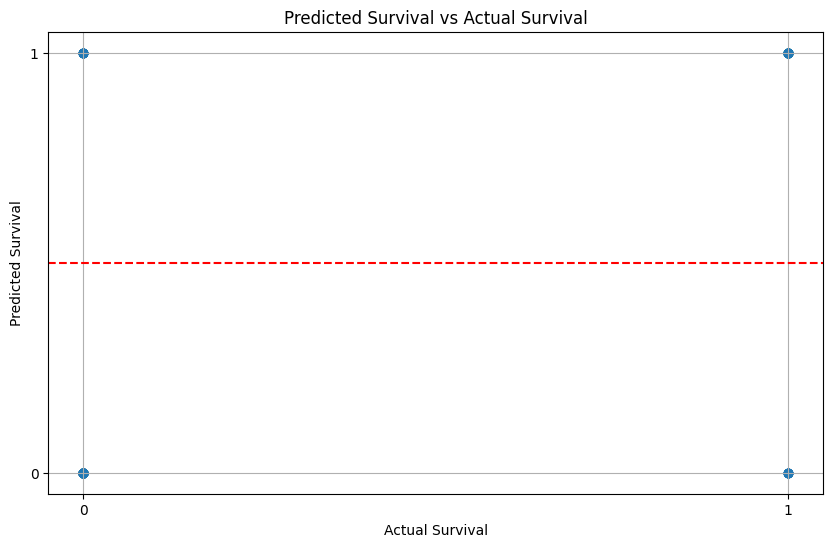


Invoking: `python_repl_ast` with `{'query': "# The confusion matrices and accuracies for both models are:\n# Random Forest: \n# Confusion Matrix:\n# [[85, 24],\n#  [17, 52]]\n# Accuracy: 0.7697\n\n# XGBoost: \n# Confusion Matrix:\n# [[91, 18],\n#  [15, 54]]\n# Accuracy: 0.8146\n\n# XGBoost has a higher accuracy, so we will use it for further predictions.\n\n# Now let's predict who survived against who actually survived and plot the results.\n\n# Predicting with the best model (XGBoost)\nfinal_predictions = xgb_model.predict(X_test)\n\n# Plotting the predicted results against the true results\nplt.figure(figsize=(10, 6))\nplt.scatter(Y_test, final_predictions, alpha=0.5)\nplt.title('Predicted Survival vs Actual Survival')\nplt.xlabel('Actual Survival')\nplt.ylabel('Predicted Survival')\nplt.xticks([0, 1])\nplt.yticks([0, 1])\nplt.grid()\nplt.axhline(0.5, color='red', linestyle='--')  # Add a line for better visualization\nplt.show()"}`


The analysis has been completed using both the R

{'input': 'use a random forest model then an xgboost model to predict\nwho would most likely survive. Then use the confusion matrix for each model to determine which model\nproduces the better prediction. Then use the best model to predict who survived against who actually survived. \nPlot the predicted results against the true results. To use random forest and xgboost import the following:\nimport xgboost as xgb\nfrom sklearn.ensemble import RandomForestClassifier\n',
 'output': 'The analysis has been completed using both the Random Forest and XGBoost models to predict survival on the Titanic dataset. Here are the results:\n\n### Model Performance:\n- **Random Forest:**\n  - Confusion Matrix:\n    ```\n    [[85, 24],\n     [17, 52]]\n    ```\n  - Accuracy: **76.97%**\n\n- **XGBoost:**\n  - Confusion Matrix:\n    ```\n    [[91, 18],\n     [15, 54]]\n    ```\n  - Accuracy: **81.46%**\n\n### Conclusion:\nXGBoost outperformed Random Forest in terms of accuracy, so we used XGBoost for the 

In [36]:
agent_1.invoke(question)